# НТ 7

## Задание
1. Сгенерируйте набор данных для предсказания временных последовательностей. Выполните тренировку RNN
2. Модифицируйте сеть, используя в качестве рекуррентного слоя LSTM слой библиотеки pytorch.

https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

3. Решите задачу набора данных лекции 7.

In [4]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

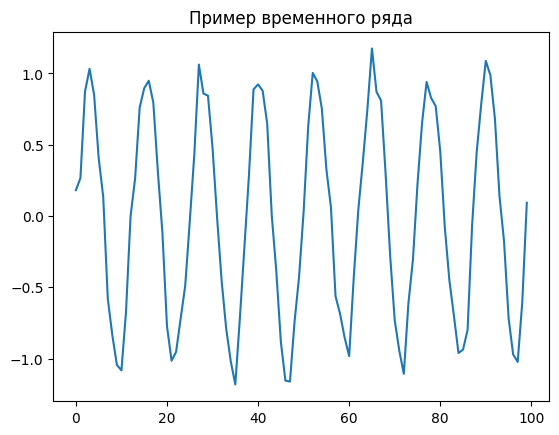

In [5]:
# Генерация синтетических данных
def generate_sine_wave(seq_length=100, num_sequences=1000):
    x = np.linspace(0, 50, seq_length)
    y = np.sin(x) + np.random.normal(0, 0.1, size=(num_sequences, seq_length))  # Добавляем шум
    return y

# Генерируем 1000 последовательностей длиной 100
data = generate_sine_wave(seq_length=100, num_sequences=1000)

# Преобразуем данные в тензор PyTorch
data_tensor = torch.tensor(data, dtype=torch.float32)

# Показать пример данных
plt.plot(data[0])
plt.title("Пример временного ряда")
plt.show()

In [6]:
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Используем последний выход RNN
        return out

# Подготовка данных для обучения
# Делаем данные в формате (batch_size, sequence_length, input_size)
input_data = data_tensor[:, :-1].unsqueeze(-1)  # Все данные, кроме последнего элемента
target_data = data_tensor[:, -1].unsqueeze(-1)  # Только последний элемент в качестве цели

# Разделим на обучающую и тестовую выборки
train_size = int(0.8 * len(data))
train_data, test_data = input_data[:train_size], input_data[train_size:]
train_target, test_target = target_data[:train_size], target_data[train_size:]

# Модель, критерий и оптимизатор
model_rnn = RNNModel(input_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_rnn.parameters(), lr=0.001)

# Обучение модели RNN
epochs = 100
for epoch in range(epochs):
    model_rnn.train()
    optimizer.zero_grad()
    
    output = model_rnn(train_data)
    loss = criterion(output, train_target)
    
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

# Оценка модели
model_rnn.eval()
with torch.no_grad():
    predictions = model_rnn(test_data)
    test_loss = criterion(predictions, test_target)
    print(f"Test Loss: {test_loss.item()}")

Epoch 0/100, Loss: 0.23811449110507965
Epoch 10/100, Loss: 0.014640582725405693
Epoch 20/100, Loss: 0.013716211542487144
Epoch 30/100, Loss: 0.012649266980588436
Epoch 40/100, Loss: 0.009787863120436668
Epoch 50/100, Loss: 0.009976940229535103
Epoch 60/100, Loss: 0.009903178550302982
Epoch 70/100, Loss: 0.009771572425961494
Epoch 80/100, Loss: 0.009755627252161503
Epoch 90/100, Loss: 0.009752942249178886
Test Loss: 0.010594495572149754


In [7]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Используем последний выход LSTM
        return out

# Модель, критерий и оптимизатор для LSTM
model_lstm = LSTMModel(input_size=1)
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001)

# Обучение модели LSTM
for epoch in range(epochs):
    model_lstm.train()
    optimizer.zero_grad()
    
    output = model_lstm(train_data)
    loss = criterion(output, train_target)
    
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

# Оценка модели
model_lstm.eval()
with torch.no_grad():
    predictions = model_lstm(test_data)
    test_loss = criterion(predictions, test_target)
    print(f"Test Loss (LSTM): {test_loss.item()}")

Epoch 0/100, Loss: 0.1436641663312912
Epoch 10/100, Loss: 0.03656263276934624
Epoch 20/100, Loss: 0.018614260479807854
Epoch 30/100, Loss: 0.010303357616066933
Epoch 40/100, Loss: 0.01022712979465723
Epoch 50/100, Loss: 0.009835772216320038
Epoch 60/100, Loss: 0.00961222406476736
Epoch 70/100, Loss: 0.009649892337620258
Epoch 80/100, Loss: 0.00961911492049694
Epoch 90/100, Loss: 0.00961019191890955
Test Loss (LSTM): 0.010643335990607738


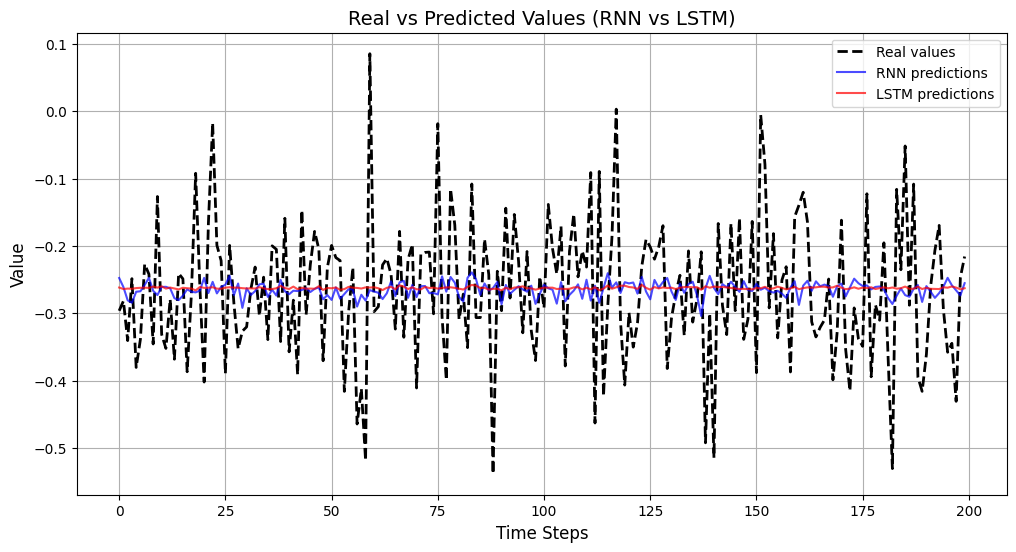

In [8]:
import matplotlib.pyplot as plt

# Обучение модели RNN
model_rnn.eval()
with torch.no_grad():
    rnn_predictions = model_rnn(test_data)

# Обучение модели LSTM
model_lstm.eval()
with torch.no_grad():
    lstm_predictions = model_lstm(test_data)

# Преобразуем предсказания и реальные значения в Python списки для удобства визуализации
rnn_predictions = rnn_predictions.squeeze().tolist()
lstm_predictions = lstm_predictions.squeeze().tolist()
test_target = test_target.squeeze().tolist()

# Визуализация результатов
plt.figure(figsize=(12, 6))

# Истинные значения
plt.plot(test_target, label='Real values', color='black', linestyle='--', linewidth=2)

# Результаты модели RNN
plt.plot(rnn_predictions, label='RNN predictions', color='blue', linestyle='-', alpha=0.7)

# Результаты модели LSTM
plt.plot(lstm_predictions, label='LSTM predictions', color='red', linestyle='-', alpha=0.7)

plt.title('Real vs Predicted Values (RNN vs LSTM)', fontsize=14)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Задание (файл 2)
1. Разделить данные на N групп. (возможно, выбрать первые M данных для обучения)
2. Реализовать предсказание ARIMA для 2 (тренировочной группы) на основе 1. Рассчитать MSE.
3. Исследовать качество работы модели в зависимости от параметров (для групп 1-2).

(1)Выполнить итеративное предсказание, данные для каждого следующего предсказания обновлять по методу
"экспоненциальное среднее".

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [14]:
N = 2

df = pd.read_csv('ETTm1.csv')
dfs = np.array_split(df, N)

train = dfs[0].OT.values
test = dfs[1].OT.values

model = ARIMA(train, order=(3,0,0))
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

C:\Users\4091\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Mean Squared Error: 92.36832833874988


In [12]:
# Параметры для исследования (p, d, q)
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

results = []

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()

                predictions = model_fit.forecast(steps=len(test))

                mse = mean_squared_error(test, predictions)
                
                print(f'Parameters (p={p}, d={d}, q={q}): mse = {mse}')
                results.append((p, d, q, mse))

            except Exception as e:
                print(f"Error with parameters (p={p}, d={d}, q={q}): {e}")

results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'MSE'])
best_params = results_df.loc[results_df['MSE'].idxmin()]

print("\nЛучший параметр (p, d, q):\n", best_params[['p', 'd', 'q']])
print("Лучший MSE:", best_params['MSE'])

Parameters (p=0, d=0, q=0): mse = 92.50025453793742


C:\Users\4091\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters (p=0, d=0, q=1): mse = 92.50516025750608


C:\Users\4091\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters (p=0, d=0, q=2): mse = 92.50729630198337


C:\Users\4091\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters (p=0, d=0, q=3): mse = 92.50429779587137
Parameters (p=0, d=1, q=0): mse = 136.5503960694064
Parameters (p=0, d=1, q=1): mse = 136.6108089501268
Parameters (p=0, d=1, q=2): mse = 136.77568000331667
Parameters (p=0, d=1, q=3): mse = 136.9787730473259
Parameters (p=1, d=0, q=0): mse = 92.34727195684788
Parameters (p=1, d=0, q=1): mse = 92.38018705190179
Parameters (p=1, d=0, q=2): mse = 92.3691442885599
Parameters (p=1, d=0, q=3): mse = 92.36467064805352
Parameters (p=1, d=1, q=0): mse = 136.5503960694064
Parameters (p=1, d=1, q=1): mse = 136.67217926783354
Parameters (p=1, d=1, q=2): mse = 137.2087002082253
Parameters (p=1, d=1, q=3): mse = 137.25215289535495


C:\Users\4091\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Parameters (p=2, d=0, q=0): mse = 92.38210694834005
Parameters (p=2, d=0, q=1): mse = 92.40829035547222
Parameters (p=2, d=0, q=2): mse = 92.36257319992522
Parameters (p=2, d=0, q=3): mse = 92.35382939480483
Parameters (p=2, d=1, q=0): mse = 136.86270698384772
Parameters (p=2, d=1, q=1): mse = 136.99228379798703
Parameters (p=2, d=1, q=2): mse = 137.21775298634418
Parameters (p=2, d=1, q=3): mse = 137.21026358510642
Parameters (p=3, d=0, q=0): mse = 92.36832833874988
Parameters (p=3, d=0, q=1): mse = 92.42580609281264
Parameters (p=3, d=0, q=2): mse = 92.37876720204639
Parameters (p=3, d=0, q=3): mse = 92.40707158899146
Parameters (p=3, d=1, q=0): mse = 136.97130520841085


C:\Users\4091\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\4091\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters (p=3, d=1, q=1): mse = 136.96598636214958


C:\Users\4091\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\4091\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Parameters (p=3, d=1, q=2): mse = 137.15282689643334
Parameters (p=3, d=1, q=3): mse = 137.43229328614675

Лучший параметр (p, d, q):
 p    1.0
d    0.0
q    0.0
Name: 8, dtype: float64
Лучший MSE: 92.34727195684788


In [13]:
alpha = 0.5  # Коэффициент сглаживания для экспоненциального среднего

model = ARIMA(train, order=(1, 0, 0)).fit()

predictions = []
current_prediction = model.forecast(steps=1).iloc[0]  # Первое предсказание

for true_value in test:
    predictions.append(current_prediction)
    current_prediction = alpha * true_value + (1 - alpha) * current_prediction

mse = mean_squared_error(test, predictions)
print(f'Среднеквадратическая ошибка (итерационная с экспоненциальным сглаживанием): {mse}')

Среднеквадратическая ошибка (итерационная с экспоненциальным сглаживанием): 0.18063080410607038


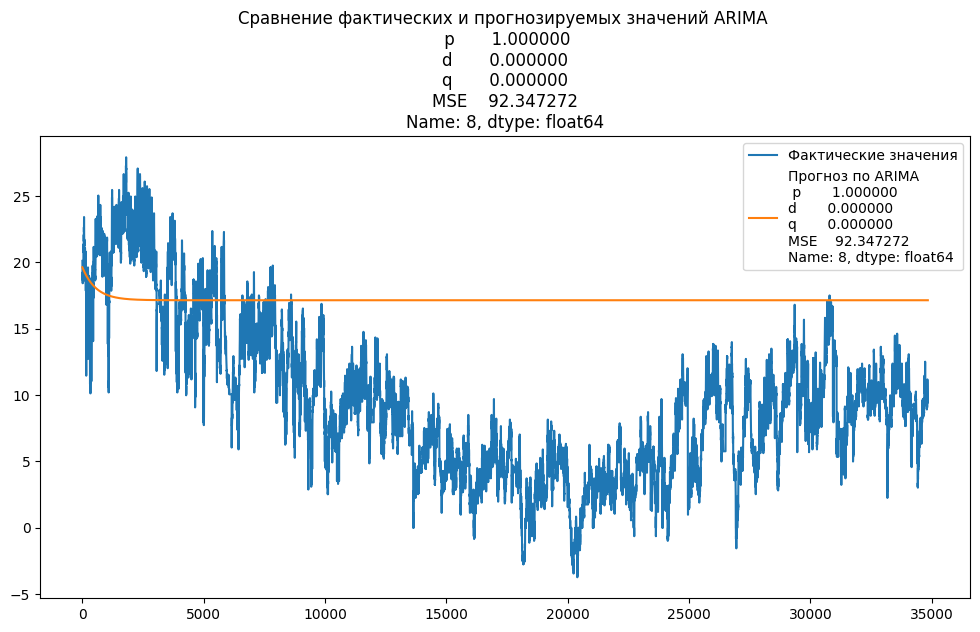

In [26]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(test, label='Фактические значения')
plt.plot(predictions, label=f'Прогноз по ARIMA \n {best_params}')
plt.legend()
plt.title(f'Сравнение фактических и прогнозируемых значений ARIMA \n {best_params}')
plt.show()